# Marketing A/B Testing and Optimization

- In the dynamic landscape of marketing, companies strive to execute effective campaigns amidst a plethora of options. To make informed decisions, they often employ A/B testing—a method that involves presenting different variations of a marketing element (such as a webpage, advertisement, or banner) to distinct groups of individuals simultaneously. This technique allows businesses to identify which version yields the best results and optimizes key performance indicators.

- This project aims to explore the application of propensity score matching to mitigate potential biases within the dataset while gaining practical insights into the execution of A/B tests for marketing strategy development. The dataset utilized for this analysis is sourced from Kaggle (https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing?datasetId=1660669).

The dataset encompasses several important fields:

- Index: Unique identifier for each row
- user id: Distinct identifier for each user
- test group: Indicates whether the user was shown an advertisement ("ad") or a Public Service Announcement ("psa")
- converted: Indicates whether the user made a purchase (True) or not (False)
- total ads: Total number of ads viewed by the user
- most ads day: The day on which the user encountered the highest number of ads
- most ads hour: The hour during which the user saw the most ads

The primary objectives of this analysis are twofold:

- To assess the overall success of the marketing campaign.
- To quantify the extent to which the success can be attributed to the advertisements.

To investigate the second objective, an A/B test will be conducted, where the majority of participants will be exposed to advertisements (the experimental group), while a smaller segment will view a Public Service Announcement (PSA) or no content at all (the control group). The analysis will focus on evaluating the effectiveness of the ads, estimating potential revenue, and determining whether the observed differences between the groups are statistically significant.

### 1. Data Loading:

- Import necessary libraries and load the dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('marketing_AB.csv')
df

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...,...
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23


### 2. Data Cleaning

In [3]:
# Drop the Unamed: 0 column as it is same as index
df.drop('Unnamed: 0',axis=1,inplace= True)
df.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [4]:
# Renaming columns for better data handling
df.rename(columns={
    "user id": "user_id",
    "test group": "test_group",
    "converted": "converted",
    "total ads": "total_ads",
    "most ads day": "most_ads_day",
    "most ads hour": "most_ads_hour"
}, inplace=True)

In [5]:
df.head()

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


### 3. Data Exploration:

- Perform exploratory data analysis (EDA) to understand the dataset.
- Check for missing values, data types, and basic statistics.

(588101, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        588101 non-null  int64 
 1   test_group     588101 non-null  object
 2   converted      588101 non-null  bool  
 3   total_ads      588101 non-null  int64 
 4   most_ads_day   588101 non-null  object
 5   most_ads_hour  588101 non-null  int64 
dtypes: bool(1), int64(3), object(2)
memory usage: 23.0+ MB
None
            user_id      total_ads  most_ads_hour
count  5.881010e+05  588101.000000  588101.000000
mean   1.310692e+06      24.820876      14.469061
std    2.022260e+05      43.715181       4.834634
min    9.000000e+05       1.000000       0.000000
25%    1.143190e+06       4.000000      11.000000
50%    1.313725e+06      13.000000      14.000000
75%    1.484088e+06      27.000000      18.000000
max    1.654483e+06    2065.000000      23.000000
user_id    

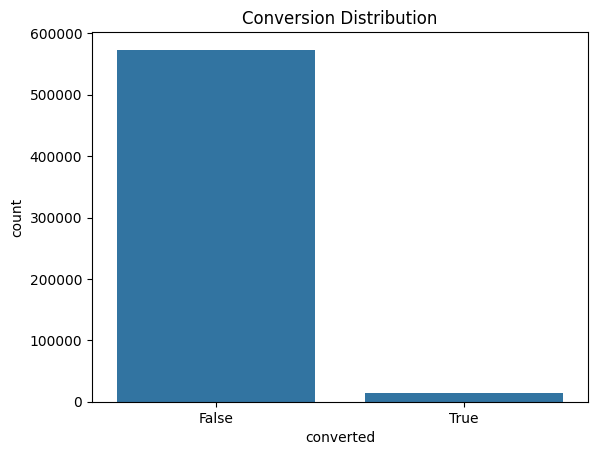

In [6]:
# Check the shape and info of the dataset
print(df.shape)
print(df.info())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isna().sum())

# Visualize the distribution of conversion rates
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='converted', data=df)
plt.title('Conversion Distribution')
plt.show()

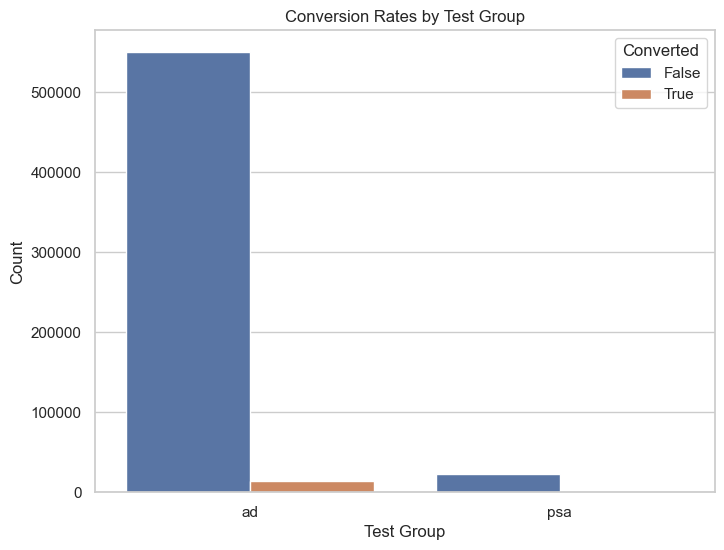

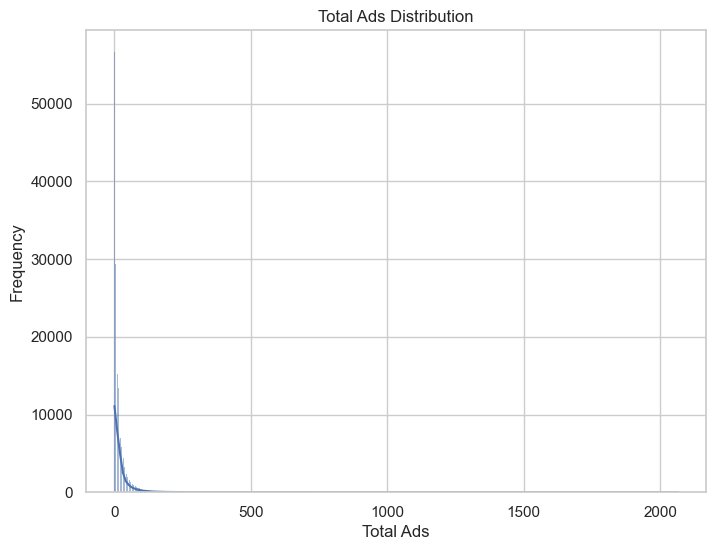

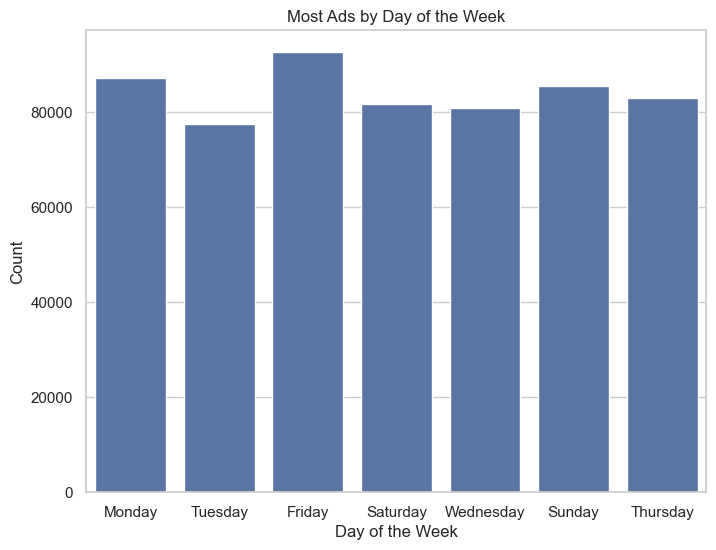

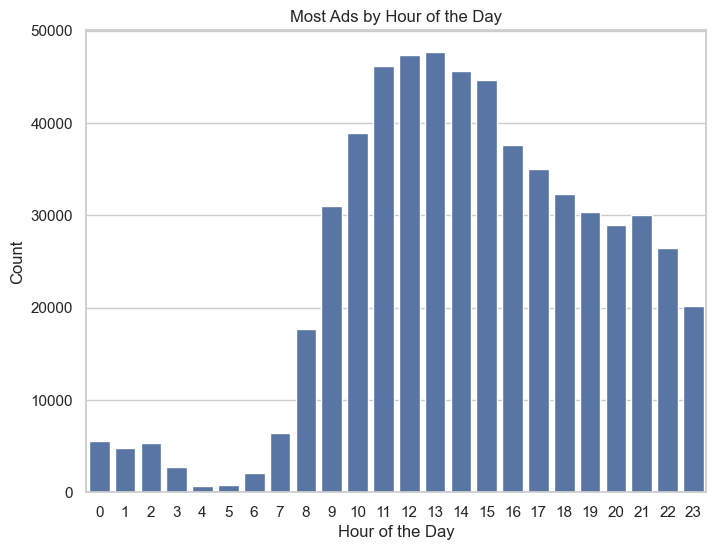

In [7]:
# Set Seaborn theme
sns.set_theme(style="whitegrid")

# 1. Conversion rates by test group
plt.figure(figsize=(8, 6))
sns.countplot(x='test_group', hue='converted', data=df)
plt.title('Conversion Rates by Test Group')
plt.ylabel('Count')
plt.xlabel('Test Group')
plt.legend(title='Converted')
plt.show()

# 2. Total ads distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['total_ads'], kde=True)
plt.title('Total Ads Distribution')
plt.xlabel('Total Ads')
plt.ylabel('Frequency')
plt.show()

# 3. Most ads by day of the week (exact values)
plt.figure(figsize=(8, 6))
sns.countplot(x='most_ads_day', data=df)
plt.title('Most Ads by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()

# 4. Most ads by hour of the day (exact values)
plt.figure(figsize=(8, 6))
sns.countplot(x='most_ads_hour', data=df)
plt.title('Most Ads by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.show()


In [8]:
# Summary
print(df.shape)
print(df.describe())
print("")
print(df["test_group"].value_counts(normalize=True))
print("")
print(df["converted"].value_counts(normalize=True))
print("")
print(df["most_ads_day"].value_counts(normalize=True))
print("")
print(df.info()) # check for null values

(588101, 6)
            user_id      total_ads  most_ads_hour
count  5.881010e+05  588101.000000  588101.000000
mean   1.310692e+06      24.820876      14.469061
std    2.022260e+05      43.715181       4.834634
min    9.000000e+05       1.000000       0.000000
25%    1.143190e+06       4.000000      11.000000
50%    1.313725e+06      13.000000      14.000000
75%    1.484088e+06      27.000000      18.000000
max    1.654483e+06    2065.000000      23.000000

test_group
ad     0.96
psa    0.04
Name: proportion, dtype: float64

converted
False    0.974761
True     0.025239
Name: proportion, dtype: float64

most_ads_day
Friday       0.157470
Monday       0.148058
Sunday       0.145198
Thursday     0.141102
Saturday     0.138854
Wednesday    0.137575
Tuesday      0.131744
Name: proportion, dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         -------------

In [7]:
# Compare the conversion rate between the two test groups
df.groupby("test_group")["converted"].value_counts(normalize=True)

test_group  converted
ad          False        0.974453
            True         0.025547
psa         False        0.982146
            True         0.017854
Name: proportion, dtype: float64

We can observe that from the cohort who sees the **advertisement**(experimental group), about 97.4% is not converted, and around 2.5% is converted.
From the cohort who sees the **Public Service Announcement**(control group), about 98.2% is not converted, and around 1.8% is converted. This means that from comparing the two groups, we can see that there is a 0.7% **decrease** of conversion rate when users only see the Public Service Announcement.

### 4. Hypothesis Testing

#### **Define the null and alternative hypothsis**

**Null Hypothesis (H₀)**: there is no difference in the conversion rates between the test group
**Alternative Hypothesis(H₁)**: there is a difference in the conversion rates between the test group and the control group

 - We first need to calculate find sample size to proceed further 

#### **Set the probability of type I and type II errors**

* we set : α=0.05 and β=0.2.

#### **Calculate the sample size**

Based on the provided conversion data, we have the conversion rates for two groups in an A/B test: one group that saw the advertisement ("ad") and another that saw a public service announcement ("psa"). The conversion rates are calculated as follows:

**Ad Group:**

* Conversion Rate: 2.55% (0.025547)

**PSA Group:**

* Conversion Rate: 1.79% (0.017854)
To determine the sample size needed for such an A/B test, you can use these conversion rates as your baseline rates (p1 and p2). Here's how you can proceed:
Steps to Determine Sample Size

**Define Parameters:**

* Baseline Conversion Rate (p1): Use the conversion rate of the PSA group, which is 1.79%.
* Expected Conversion Rate (p2): Use the conversion rate of the Ad group, which is 2.55%.
* Significance Level (α): Typically set at 0.05.
* Power (1-β): Typically set at 0.8 (80%).

In [8]:
from statsmodels.stats.power import NormalIndPower

# Parameters
alpha = 0.05  # Significance level
power = 0.8   # Power
p1 = 0.017854  # Conversion rate for control group (psa) # can be whatever the business requires
p2 = 0.025547  # Conversion rate for test group (ad) # can be whatever the business requires

# Calculate the average conversion rate
p = (p1 + p2) / 2

# Calculate the effect size
effect_size = (p2 - p1) / ((p * (1 - p)) ** 0.5)

# Calculate the sample size per group
power_analysis = NormalIndPower()
sample_size = power_analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha, ratio=1)

print(f"Required sample size per group: {int(sample_size)}")

Required sample size per group: 5631


Since we have more than 5631 each, we don't need to worry about this. Usually this is calculated before the test is done, so that they can gain an estimate of how long the test would need to run

### Performing Chi2 Test 
- to see if there is any significance between the test_groups and conversions

In [27]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['test_group'], df['converted'])

# Perform Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-squared statistic: {chi2}, p-value: {p}")

Chi-squared statistic: 54.005823883685245, p-value: 1.9989623063390075e-13


#### In general, the p-value can be interpreted as follows:

- p-value < 0.01: Strong evidence against the null hypothesis (i.e., the observed association is statistically significant)
- p-value < 0.05: Moderate evidence against the null hypothesis (i.e., the observed association is statistically significant, but not as strong as p-value < 0.01)
- p-value > 0.05: Weak evidence against the null hypothesis (i.e., the observed association is not statistically significant)

#### In this case, the p-value is very small (1.998e-13), which suggests that the observed association between the two variables is statistically significant, and we can reject the null hypothesis.
#### i.e. We accept the **Alternative Hypothesis(H₁)**: there is a difference in the conversion rates between the test group and the control group

### 5. Confounder Analysis
We want to check for covariates/confounders to make sure there is definietly a  difference in conversion rates between the test group and the control group.

To check if there's a significant difference in the distribution of categorical covariates (like most ads day or most ads hour) between the test and control group, We can perform Chi-squared test.

In [28]:
# Chi-squared test for 'most ads day'
contingency_table = pd.crosstab(df['most_ads_day'], df['test_group'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared test for 'most ads day' p-value: {p}")

# Chi-squared test for 'most ads day'
contingency_table = pd.crosstab(df['most_ads_hour'], df['test_group'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared test for 'most ads hour' p-value: {p}")

Chi-squared test for 'most ads day' p-value: 4.849067664297987e-48
Chi-squared test for 'most ads hour' p-value: 1.094573971081402e-28


These results suggest that there is a statistically significant difference in the distribution of the day and hour on which users saw the most ads between the two groups.

Now, to know if the mean value of numerical data (like total ads) significantly differs between two groups, we will perform t-test. Along with the t-test, we will also use Mann-Whitney U test for total ads to get more comprehensive understanding of the differences between groups.

The assumption for t-test is that the data are normally distributed and that the variances of the two groups are equal. However, real-world data may not always meet these assumptions. On the other hand, Mann-Whitney U test does not require the data to follow a normal distribution, making it a non-parametric alternative to the T-test.

In [30]:
from scipy.stats import ttest_ind, mannwhitneyu

# T-test
stat, p = ttest_ind(df[df['test_group'] == 'ad']['total_ads'],
                    df[df['test_group'] == 'psa']['total_ads'])
print(f"T-test p-value: {p}")

# Mann-Whitney U Test
stat, p = mannwhitneyu(df[df['test_group'] == 'ad']['total_ads'],
                       df[df['test_group'] == 'psa']['total_ads'])
print(f"Mann-Whitney U test p-value: {p}")

T-test p-value: 0.8306134186810267
Mann-Whitney U test p-value: 4.6909108547205694e-11


The t-test result suggests that the distributions of total ads between the two groups are not significantly different. However, the Mann-Whitney U test, which is less sensitive to the data's distribution, suggests that there is a significant difference in the distribution of total ads between the groups. Since the result of the two tests came out differently, I can assume that the assumptions of t-test is not met, and there might be potential bias.

### 6. Propensity Score Matching

Overall, there is significant differences in the covariates between the groups that we will need to somehow handle this issue. Although techniques such as stratification or resampling may be the traditional ways here, I will be using the **propensity score matching** to adjust for the potential confounding variables and improve causal inference. Propensity score matching (PSM) is a statistical method that aims to reduce the bias in the estimated treatment effect by creating comparable treatment and control groups based on their propensity scores. PSM matches individuals with similar propensity scores in the treatment and control groups, which can balance the distribution of potential covariates and reduce the impact of unobserved variables.

Reference: https://towardsdatascience.com/common-mistakes-during-a-b-testing-bdb9eefdc7f0

To implement PSM, we will first estimate the propensity scores, which are the probabilities of each unit being assigned to the treatment given their observed covariates. Then, we will match units in the treatment group with similar units in the control group based on these scores.

In [13]:
# Identify outcome variable and treatment assignment variable
outcome_var = 'converted'
treatment_var = 'test_group'

In [31]:
import statsmodels.api as sm

# Create dummy variables for categorical variables
df_dummy = pd.get_dummies(df, columns=['most_ads_day', 'most_ads_hour'], drop_first=True, dtype=int)

# Define X and y with the updated DataFrame
X = df_dummy.drop(['user_id', 'test_group', 'converted'], axis=1)
y = df_dummy['test_group'].apply(lambda x: 1 if x == 'ad' else 0)

# Add a constant to the model for the intercept
X = sm.add_constant(X)

# Attempt to fit the model
model = sm.Logit(y, X)
result = model.fit()
propensity_scores = result.predict(X)

Optimization terminated successfully.
         Current function value: 0.167577
         Iterations 7


In [32]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             test_group   No. Observations:               588101
Model:                          Logit   Df Residuals:                   588070
Method:                           MLE   Df Model:                           30
Date:                Wed, 16 Oct 2024   Pseudo R-squ.:                0.002184
Time:                        20:22:23   Log-Likelihood:                -98552.
converged:                       True   LL-Null:                       -98768.
Covariance Type:            nonrobust   LLR p-value:                 1.257e-72
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3.1128      0.070     44.731      0.000       2.976       3.249
total_ads               4.378e-05      0.000      0.287      0.774      -0.000       0.000
most_ads_day_Monday        0.0265      0.024      1.108      0.268      -0.020       0.073
most_ads_day_Saturday      0.1666      0.025      6.599      0.000       0.117       0.216
most_ads_day_Sunday        0.1470      0.025      5.932      0.000       0.098       0.196
most_ads_day_Thursday     -0.1409      0.023     -6.042      0.000      -0.187      -0.095
most_ads_day_Tuesday       0.1042      0.025      4.142      0.000       0.055       0.154
most_ads_day_Wednesday    -0.0447      0.024     -1.864      0.062      -0.092       0.002
most_ads_hour_1            0.0557      0.101      0.553      0.580      -0.142       0.253
most_ads_hour_2            0.1973      0.102      1.942      0.052      -0.002       0.396
most_ads_hour_3            0.2262      0.127      1.776      0.076      -0.023       0.476
most_ads_hour_4            0.0709      0.204      0.347      0.729      -0.330       0.471
most_ads_hour_5            0.3314      0.222      1.490      0.136      -0.104       0.767
most_ads_hour_6            0.0365      0.131      0.278      0.781      -0.220       0.293
most_ads_hour_7            0.1187      0.095      1.252      0.210      -0.067       0.304
most_ads_hour_8            0.1062      0.079      1.352      0.176      -0.048       0.260
most_ads_hour_9            0.0699      0.074      0.946      0.344      -0.075       0.215
most_ads_hour_10           0.0810      0.073      1.113      0.266      -0.062       0.224
most_ads_hour_11          -0.0841      0.071     -1.177      0.239      -0.224       0.056
most_ads_hour_12          -0.0555      0.071     -0.777      0.437      -0.196       0.085
most_ads_hour_13          -0.1010      0.071     -1.416      0.157      -0.241       0.039
most_ads_hour_14           0.0073      0.072      0.102      0.919      -0.133       0.148
most_ads_hour_15           0.0084      0.072      0.117      0.907      -0.132       0.149
most_ads_hour_16          -0.0333      0.072     -0.460      0.645      -0.175       0.109
most_ads_hour_17           0.0446      0.073      0.609      0.542      -0.099       0.188
most_ads_hour_18           0.0501      0.074      0.681      0.496      -0.094       0.194
most_ads_hour_19           0.0577      0.074      0.780      0.436      -0.087       0.203
most_ads_hour_20           0.1041      0.075      1.397      0.163      -0.042       0.250
most_ads_hour_21           0.1400      0.075      1.878      0.060      -0.006       0.286
most_ads_hour_22           0.1839      0.076      2.430      0.015       0.036       0.332
most_ads_hour_23           0.3133      0.079      3.958      0.000       0.158       0.468
==========================================================================================
"""

In [33]:
[propensity_scores]

[0         0.962642
 1         0.967859
 2         0.963316
 3         0.964892
 4         0.958200
             ...   
 588096    0.971539
 588097    0.971539
 588098    0.971541
 588099    0.971539
 588100    0.971539
 Length: 588101, dtype: float64]

In [34]:
df_dummy

,user_id,test_group,converted,total_ads,most_ads_day_Monday,most_ads_day_Saturday,most_ads_day_Sunday,most_ads_day_Thursday,most_ads_day_Tuesday,most_ads_day_Wednesday,...,most_ads_hour_14,most_ads_hour_15,most_ads_hour_16,most_ads_hour_17,most_ads_hour_18,most_ads_hour_19,most_ads_hour_20,most_ads_hour_21,most_ads_hour_22,most_ads_hour_23
0,1069124,ad,False,130,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1119715,ad,False,93,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,1144181,ad,False,21,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,1435133,ad,False,355,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1015700,ad,False,276,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588096,1278437,ad,False,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
588097,1327975,ad,False,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
588098,1038442,ad,False,3,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
588099,1496395,ad,False,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [48]:
from sklearn.neighbors import NearestNeighbors
import pandas as pd

# Define the treatment and control groups
treatment_group = df_dummy[df_dummy['test_group'] == 'ad']
control_group = df_dummy[df_dummy['test_group'] == 'psa']

# Define the covariates
covariates = [col for col in df_dummy.columns if "ads" in col]

# Standardize the covariates
scaler = StandardScaler()
treatment_covariates_scaled = scaler.fit_transform(treatment_group[covariates])
control_covariates_scaled = scaler.transform(control_group[covariates])

# Assuming you have already calculated propensity scores and have treatment and control groups
# Let's say `treatment_group` is the ad group and `control_group` is the psa group

# Step 1: Perform Nearest Neighbors Matching
nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(control_covariates_scaled)
distances, indices = nbrs.kneighbors(treatment_covariates_scaled)

# Step 2: Create a DataFrame of matched pairs
matched_pairs = pd.DataFrame({
    'treatment_index': treatment_group.index,
    'control_index': control_group.index[indices.flatten()]
})

# Remove duplicate control indices
matched_pairs = matched_pairs.drop_duplicates(subset='control_index', keep='first')

# Step 3: Get unique control indices
unique_control_indices = matched_pairs['control_index'].unique()

# Step 4: Filter the matched treatment group to only include those that have unique matches
matched_treatment_group = treatment_group.loc[matched_pairs['treatment_index']]

# Create the matched control group
matched_control_group = control_group.loc[matched_pairs['control_index']]

# Combine the matched treatment and control groups
matched_df = pd.concat([matched_treatment_group, matched_control_group])

# Print the number of matched pairs
print("Number of matched pairs:", len(matched_df))

# Print the sample size
print(matched_df['test_group'].value_counts())

Number of matched pairs: 15082
test_group
ad     7541
psa    7541
Name: count, dtype: int64


This is well over the required sample size of 5631 per group

In [49]:
df_dummy['test_group'].value_counts()

test_group
ad     564577
psa     23524
Name: count, dtype: int64

In [50]:
matched_df['test_group'].value_counts()

test_group
ad     7541
psa    7541
Name: count, dtype: int64

In [51]:
# Check balance of covariates between treatment and control groups
pd.set_option('display.max_columns', None)
matched_df.groupby(treatment_var).mean()[covariates + [outcome_var]]

,total_ads,most_ads_day_Monday,most_ads_day_Saturday,most_ads_day_Sunday,most_ads_day_Thursday,most_ads_day_Tuesday,most_ads_day_Wednesday,most_ads_hour_1,most_ads_hour_2,most_ads_hour_3,most_ads_hour_4,most_ads_hour_5,most_ads_hour_6,most_ads_hour_7,most_ads_hour_8,most_ads_hour_9,most_ads_hour_10,most_ads_hour_11,most_ads_hour_12,most_ads_hour_13,most_ads_hour_14,most_ads_hour_15,most_ads_hour_16,most_ads_hour_17,most_ads_hour_18,most_ads_hour_19,most_ads_hour_20,most_ads_hour_21,most_ads_hour_22,most_ads_hour_23,converted
test_group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ad,53.771118,0.139769,0.142289,0.143482,0.162843,0.120939,0.138178,0.017504,0.018433,0.010609,0.003448,0.002785,0.00968,0.020422,0.038722,0.053839,0.059541,0.066967,0.069089,0.072139,0.063519,0.069089,0.056359,0.054369,0.054767,0.055032,0.052778,0.051319,0.044159,0.035009,0.033152
psa,52.315741,0.139637,0.141891,0.143880,0.163506,0.120143,0.137515,0.017504,0.018433,0.010609,0.003448,0.002785,0.00968,0.020422,0.038722,0.053706,0.059541,0.067100,0.069222,0.072272,0.063652,0.069089,0.056359,0.054369,0.054767,0.055032,0.052646,0.051319,0.044159,0.035009,0.036733


Conversion Summary:
converted   False  True 
test_group              
ad           7291    250
psa          7264    277


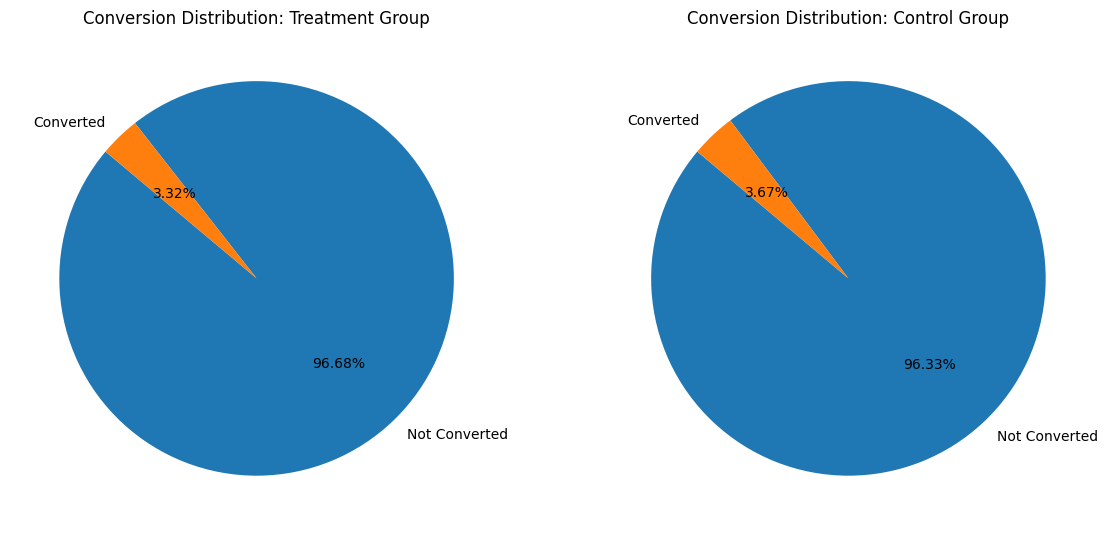

In [52]:
# Aggregate conversion data for each test group
conversion_summary = matched_df.groupby('test_group')['converted'].value_counts().unstack(fill_value=0)

# Print the conversion summary
print("Conversion Summary:")
print(conversion_summary)

# Create pie charts
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
labels = ['Not Converted', 'Converted']

# Treatment Group Pie Chart
axes[0].pie(conversion_summary.loc['ad'], labels=labels, autopct='%1.2f%%', startangle=140)
axes[0].set_title('Conversion Distribution: Treatment Group')

# Control Group Pie Chart
axes[1].pie(conversion_summary.loc['psa'], labels=labels, autopct='%1.2f%%', startangle=140)
axes[1].set_title('Conversion Distribution: Control Group')

plt.show()

- The conversion rates for the treatment group (ad) and control group (psa) are 3.33% (250/7291) and 3.69% (277/7264), respectively.
Although the conversion rate for the control group is slightly higher, the difference is not that significant.

### 7.Final Analysis and Chi-Squared Test After Matching:

Now that we have done matching and comparing the outcomes between the groups, we will go ahead and test if the difference of conversion is significant between the two groups by conducting Chi-Squared Test.

In [53]:
# Chi-squared test for the conversion after matching
contingency_table = pd.crosstab(matched_df['converted'], matched_df['test_group'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared test for conversion p-value: {p}")
print(f"Chi-squared statistic: {chi2}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies: {expected}")

Chi-squared test for conversion p-value: 0.24895168869719692
Chi-squared statistic: 1.3291769686010728
Degrees of freedom: 1
Expected frequencies: [[7277.5 7277.5]
 [ 263.5  263.5]]


Based on the Chi-squared test results, there is no statistically significant difference in the conversion rates between the treatment (ad) and control (psa) groups. 

The p-value of 0.24895168869719692 is greater than the typical significance level of 0.05. This indicates that we fail to reject the null hypothesis.

### Implications of the Findings


#### Effect of Confounders:

The initial significant result suggests that confounding variables were indeed influencing the outcome. This highlights the importance of controlling for these variables in observational studies to avoid misleading conclusions.

#### Causal Inference:

The lack of significance after matching suggests that the ads may not have a direct causal effect on conversion rates when accounting for confounding factors. This is a critical insight for decision-making, as it indicates that the observed effect in the unadjusted analysis was likely due to these confounders rather than the ads themselves.

#### Reevaluation of Marketing Strategy:

Given the results after matching, the company may need to reevaluate its marketing strategy. If the ads do not significantly increase conversion rates when controlling for confounders, it may be necessary to explore other marketing tactics or improve the ad content and targeting.

## 8. Conclusion

In summary, this project illustrates the necessity of using robust statistical techniques to evaluate marketing strategies effectively. It serves as a reminder that while initial findings may suggest a certain level of effectiveness, a deeper analysis that accounts for confounding variables is essential for making informed business decisions. The insights gained from this analysis can guide marketing companies in optimizing their campaigns and improving conversion rates, ultimately leading to more successful marketing strategies.